# Generating the sample data

In [6]:
import tensorflow as tf

# Sample dataset (X: input, y: labels)
X = tf.constant([[1.0, 0.5],
                 [0.9, 0.7],
                 [0.4, 0.6],
                 [0.3, 0.4],
                 [1.1, 0.8],
                 [0.6, 0.9]], dtype=tf.float32)

y = tf.constant([[1, 1], [1, 0], [0, 1], [0, 0], [1, 1], [0, 0]], dtype=tf.float32)

print(type(X), type(y))
print(X)
print(y)


<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(
[[1.  0.5]
 [0.9 0.7]
 [0.4 0.6]
 [0.3 0.4]
 [1.1 0.8]
 [0.6 0.9]], shape=(6, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 0.]
 [0. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]], shape=(6, 2), dtype=float32)


# Standardization + Normalization

In [7]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Sample dataset (X: input)
X = tf.constant([[1.0, 0.5],
                 [0.9, 0.7],
                 [0.4, 0.6],
                 [0.3, 0.4],
                 [1.1, 0.8],
                 [0.6, 0.9]], dtype=tf.float32)

print('\n', type(X))
print(X.numpy())

# Z-score Scaling (Standardization) data to have mean = 0 and std = 1
standard_scaler = StandardScaler()
data_standardized = standard_scaler.fit_transform(X.numpy())
print('\n', type(data_standardized))
print(data_standardized)

# Min-Max Scaling (Normalization) - values scaled to a specific range
min_max_scaler = MinMaxScaler()
data_normalized = min_max_scaler.fit_transform(data_standardized)
print('\n', type(data_normalized))
print(data_normalized)

# Convert back to TensorFlow tensor
X = tf.convert_to_tensor(data_normalized, dtype=tf.float32)
print('\n', type(X))
print(X.numpy())



 <class 'tensorflow.python.framework.ops.EagerTensor'>
[[1.  0.5]
 [0.9 0.7]
 [0.4 0.6]
 [0.3 0.4]
 [1.1 0.8]
 [0.6 0.9]]

 <class 'numpy.ndarray'>
[[ 0.93724036 -0.87831014]
 [ 0.60644954  0.29276994]
 [-1.047504   -0.2927699 ]
 [-1.3782946  -1.4638501 ]
 [ 1.2680311   0.87831014]
 [-0.38592246  1.46385   ]]

 <class 'numpy.ndarray'>
[[0.875      0.20000002]
 [0.74999994 0.6       ]
 [0.12499994 0.4000001 ]
 [0.         0.        ]
 [1.         0.8000001 ]
 [0.375      1.        ]]

 <class 'tensorflow.python.framework.ops.EagerTensor'>
[[0.875      0.20000002]
 [0.74999994 0.6       ]
 [0.12499994 0.4000001 ]
 [0.         0.        ]
 [1.         0.8000001 ]
 [0.375      1.        ]]


# Creating the model

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define a simple neural network
class SimpleNN(keras.Model):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = layers.Dense(3, input_shape=(2,), activation=None)  # First layer (2 inputs, 3 neurons)
        self.act1 = layers.ReLU()
        self.fc2 = layers.Dense(2, activation=None)  # Output layer (3 inputs, 2 outputs)
        self.act2 = layers.Activation('sigmoid')

    def call(self, x):
        # Print model parameters
        initial_params = {v.name: v.numpy() for v in self.trainable_variables}
        for name, param in initial_params.items():
            print(f"\nParameters of {name}: \n{param}\n")

        x = self.fc1(x)
        print(f"\nActivation after first hidden layer: \n{x.numpy()}")  # Print activations of the first layer
        x = self.act1(x)
        print(f"\nNon-linearity after first ReLU layer: \n{x.numpy()}")  # Print non-linearity of the first layer
        x = self.fc2(x)
        print(f"\nActivation after second output layer: \n{x.numpy()}")  # Print activations of the second layer
        x = self.act2(x)
        print(f"\nOutput after second output layer (sigmoid): \n{x.numpy()}")  # Print output of the model
        return x

# Instantiate model
model = SimpleNN()

# Define loss function and optimizer
loss_fn = keras.losses.BinaryCrossentropy()
optimizer = keras.optimizers.Adam(learning_rate=0.001)

print("Model created successfully")


Model created successfully


c:\Users\Gautam Takhellambam\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Training & evaluation

In [9]:
import numpy as np

# Convert X and y to TensorFlow tensors
X_tf = tf.convert_to_tensor(X.numpy(), dtype=tf.float32)
y_tf = tf.convert_to_tensor(y.numpy(), dtype=tf.float32)

no_of_epoch = 10

# Training loop
for epoch in range(no_of_epoch):  
    print(f"\n\n\n\nEpoch {epoch+1}:")
    
    with tf.GradientTape() as tape:             
        # Forward pass
        outputs = model(X_tf)
        loss = loss_fn(y_tf, outputs)

        # Print loss for tracking
        print(f"\nEpoch [{epoch+1}/{no_of_epoch}], Loss: {loss.numpy()}")

    # Compute gradients
    gradients = tape.gradient(loss, model.trainable_variables)

    # Print gradients for each layer
    for var, grad in zip(model.trainable_variables, gradients):
        print(f"\nGradient of {var.name} after backward pass: \n{grad.numpy()}")

    # Print weights before the update
    for var in model.trainable_variables:
        print(f"\nWeights of {var.name} before update: \n{var.numpy()}")

    # Update weights
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    # Print weights after the update
    for var in model.trainable_variables:
        print(f"\nWeights of {var.name} after update: \n{var.numpy()}")






Epoch 1:

Parameters of kernel: 
[[-0.23330271  0.05059576  0.6155164 ]
 [ 1.0137458   0.37962914  0.85187435]]


Parameters of bias: 
[0. 0. 0.]


Activation after first hidden layer: 
[[-0.0013907   0.12019712  0.7089517 ]
 [ 0.4332705   0.2657243   0.97276187]
 [ 0.3763356   0.15817615  0.41768935]
 [ 0.          0.          0.        ]
 [ 0.577694    0.3542991   1.2970159 ]
 [ 0.92625725  0.39860255  1.082693  ]]

Non-linearity after first ReLU layer: 
[[0.         0.12019712 0.7089517 ]
 [0.4332705  0.2657243  0.97276187]
 [0.3763356  0.15817615 0.41768935]
 [0.         0.         0.        ]
 [0.577694   0.3542991  1.2970159 ]
 [0.92625725 0.39860255 1.082693  ]]

Activation after second output layer: 
[[-0.3517997   0.10913294]
 [-0.28386524  0.14344586]
 [-0.03459071  0.05872421]
 [ 0.          0.        ]
 [-0.37848705  0.19126116]
 [-0.11225232  0.15296157]]

Output after second output layer (sigmoid): 
[[0.412946   0.5272562 ]
 [0.4295064  0.53580004]
 [0.49135318 0.5146

# Mini Batch gradient descent

Epoch [1/20], Train Loss: 0.7076, Test Loss: 0.7007
Epoch [2/20], Train Loss: 0.7066, Test Loss: 0.6989
Epoch [3/20], Train Loss: 0.7054, Test Loss: 0.6975
Epoch [4/20], Train Loss: 0.7041, Test Loss: 0.6963
Epoch [5/20], Train Loss: 0.7031, Test Loss: 0.6951
Epoch [6/20], Train Loss: 0.7019, Test Loss: 0.6939
Epoch [7/20], Train Loss: 0.7011, Test Loss: 0.6926
Epoch [8/20], Train Loss: 0.6997, Test Loss: 0.6914
Epoch [9/20], Train Loss: 0.6990, Test Loss: 0.6903
Epoch [10/20], Train Loss: 0.6982, Test Loss: 0.6891
Epoch [11/20], Train Loss: 0.6970, Test Loss: 0.6881
Epoch [12/20], Train Loss: 0.6960, Test Loss: 0.6872
Epoch [13/20], Train Loss: 0.6953, Test Loss: 0.6862
Epoch [14/20], Train Loss: 0.6943, Test Loss: 0.6852
Epoch [15/20], Train Loss: 0.6938, Test Loss: 0.6840
Epoch [16/20], Train Loss: 0.6927, Test Loss: 0.6830
Epoch [17/20], Train Loss: 0.6920, Test Loss: 0.6821
Epoch [18/20], Train Loss: 0.6913, Test Loss: 0.6812
Epoch [19/20], Train Loss: 0.6903, Test Loss: 0.6804
Ep

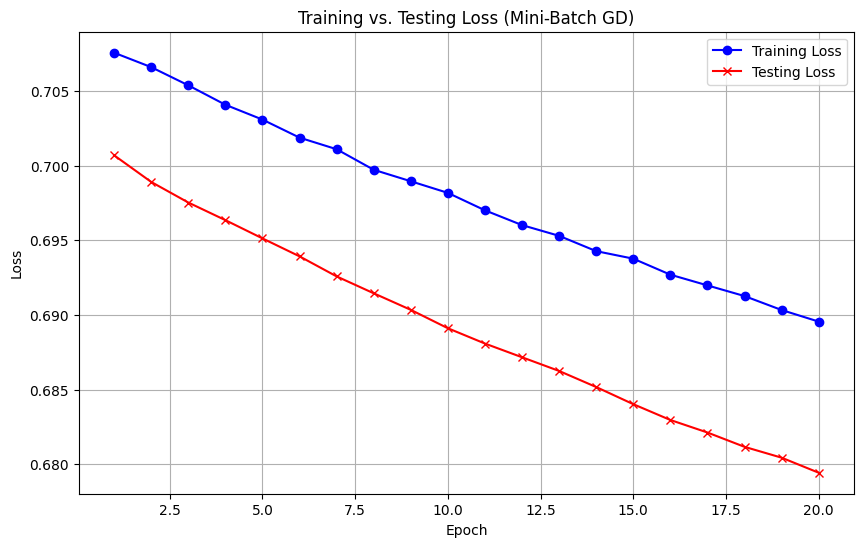

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
tf.random.set_seed(42)

# Sample dataset
X = np.array([[1.0, 0.5],
              [0.9, 0.7],
              [0.4, 0.6],
              [0.3, 0.4],
              [1.1, 0.8],
              [0.6, 0.9]], dtype=np.float32)

y = np.array([[1, 1], [1, 1], [0, 1], [0, 0], [1, 1], [1, 1]], dtype=np.float32)

# Scaling the data
standard_scaler = StandardScaler()
data_standardized = standard_scaler.fit_transform(X)

min_max_scaler = MinMaxScaler()
data_normalized = min_max_scaler.fit_transform(data_standardized)

# Convert to NumPy arrays
X = np.array(data_normalized, dtype=np.float32)
y = np.array(y, dtype=np.float32)

# Splitting into training and testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create TensorFlow Dataset for mini-batch gradient descent
batch_size = 1  # Adjust batch size here
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size).shuffle(len(X_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size)

# Define Neural Network
class SimpleNN(keras.Model):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = layers.Dense(3, activation='relu')
        self.fc2 = layers.Dense(2, activation='sigmoid')

    def call(self, inputs):
        x = self.fc1(inputs)
        x = self.fc2(x)
        return x

# Instantiate model, loss function, and optimizer
model = SimpleNN()
loss_fn = keras.losses.BinaryCrossentropy()
optimizer = keras.optimizers.Adam(learning_rate=0.001)

# Training loop with Mini-Batch Gradient Descent
no_of_epoch = 20
train_loss_history = []
test_loss_history = []

for epoch in range(no_of_epoch):
    # Training phase
    running_loss = 0.0
    for batch_X, batch_y in train_dataset:
        with tf.GradientTape() as tape:
            outputs_train = model(batch_X)
            train_loss = loss_fn(batch_y, outputs_train)
        
        # Compute gradients and update weights
        gradients = tape.gradient(train_loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        
        running_loss += train_loss.numpy()
    
    # Store average training loss
    avg_train_loss = running_loss / len(train_dataset)
    train_loss_history.append(avg_train_loss)

    # Testing phase (without gradient calculation)
    test_loss = 0.0
    for batch_X, batch_y in test_dataset:
        outputs_test = model(batch_X)
        batch_test_loss = loss_fn(batch_y, outputs_test)
        test_loss += batch_test_loss.numpy()

    avg_test_loss = test_loss / len(test_dataset)
    test_loss_history.append(avg_test_loss)

    # Print progress
    print(f"Epoch [{epoch + 1}/{no_of_epoch}], "
          f"Train Loss: {avg_train_loss:.4f}, "
          f"Test Loss: {avg_test_loss:.4f}")

# Plot Training and Testing Loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, no_of_epoch + 1), train_loss_history, label='Training Loss', color='blue', marker='o')
plt.plot(range(1, no_of_epoch + 1), test_loss_history, label='Testing Loss', color='red', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs. Testing Loss (Mini-Batch GD)')
plt.grid(True)
plt.legend()
plt.show()
